![](2023-02-09-09-35-08.png)

Image Credits: [Unsplash - Tech Daily](https://unsplash.com/photos/lKYV7FaUMzA)

# HDSC FALL'22 Capstone Project: Currency Foreign Exchange Rates
## A Project by Team Pycaret

### About Dataset
This is a historical dataset of currency foreign exchange rates. This dataset includes 113 currencies in total with exchange values in varied permutations. It can be used for various task like time series analysis and forecasting. There are approximately 1.4million rows and 7 columns in the dataset.

The data has two main columns in particular:
* slug
* currency
> Slug column is of the form "ABC/PQR" where ABC and PQR are standard active currency codes as of ISO 4217.
>
>Currency contains a currency code which is the unit of the value in the tables. For examples, if slug is JPY/INR and currency is INR it means that
<center>1 JPY = xINR</center>
where x is in INR

The other columns are the regular OHLC (Open - High - Low - Close) columns along with the date


In [1]:
import main_functions as mfn
import plotly.offline as po
po.init_notebook_mode(connected=True)

In [2]:
mfn.data_preview()

,slug,date,open,high,low,close,currency
0,GBP/EGP,2001-04-10,5.58090,5.5947,5.5947,5.5947,EGP
1,GBP/EGP,2001-06-04,5.47517,5.4939,5.4939,5.4939,EGP
2,GBP/EGP,2001-08-01,5.67990,5.6543,5.6543,5.6543,EGP
3,GBP/EGP,2002-07-29,7.21700,7.2170,7.2170,7.2170,EGP
4,GBP/EGP,2003-01-02,7.42429,7.3899,7.3899,7.3899,EGP


In [3]:
slug_splt = mfn.slug_split()
slug_splt.head()

,slug,date,open,high,low,close,currency,A,B
0,GBP/EGP,2001-04-10,5.58090,5.5947,5.5947,5.5947,EGP,GBP,EGP
1,GBP/EGP,2001-06-04,5.47517,5.4939,5.4939,5.4939,EGP,GBP,EGP
2,GBP/EGP,2001-08-01,5.67990,5.6543,5.6543,5.6543,EGP,GBP,EGP
3,GBP/EGP,2002-07-29,7.21700,7.2170,7.2170,7.2170,EGP,GBP,EGP
4,GBP/EGP,2003-01-02,7.42429,7.3899,7.3899,7.3899,EGP,GBP,EGP


#Check the Possiblities for CurA and CurB

In [4]:
curA, curB = mfn.uniq_cur()
print('There are only 7 unique possible currency on the left side of the pair \n')
print(curA)
print('='*100)
print('There are 113 unique currency on the right side of the pair \n')
print(curB)

There are only 7 unique possible currency on the left side of the pair 

['GBP' 'EUR' 'AUD' 'JPY' 'CHF' 'USD' 'INR']
There are 113 unique currency on the right side of the pair 

['EGP' 'SCR' 'NOK' 'SZL' 'MYR' 'PKR' 'NZD' 'CUP' 'CAD' 'CHF' 'ZMW' 'FJD'
 'XOF' 'IDR' 'JPY' 'UAH' 'TWD' 'MMK' 'BRL' 'CNY' 'HUF' 'MXN' 'BMD' 'KWD'
 'BBD' 'TTD' 'SEK' 'BWP' 'HNL' 'CZK' 'ISK' 'LKR' 'USD' 'RON' 'EUR' 'TND'
 'ZAR' 'SGD' 'BYN' 'PEN' 'XPF' 'THB' 'GBP' 'KRW' 'AUD' 'MOP' 'PGK' 'PHP'
 'BSD' 'CRC' 'JOD' 'MZN' 'TRY' 'BGN' 'DJF' 'COP' 'INR' 'BAM' 'PLN' 'SAR'
 'ARS' 'IRR' 'NIO' 'MWK' 'LBP' 'IQD' 'KES' 'UGX' 'KZT' 'NGN' 'GTQ' 'PYG'
 'ETB' 'SVC' 'VND' 'BND' 'MAD' 'KYD' 'ILS' 'MKD' 'HKD' 'RUB' 'AED' 'GMD'
 'BZD' 'SLL' 'MVR' 'DKK' 'MUR' 'JMD' 'OMR' 'DZD' 'BOB' 'GHS' 'RSD' 'TZS'
 'UZS' 'BDT' 'CLP' 'MGA' 'QAR' 'ANG' 'HTG' 'BHD' 'ALL' 'BIF' 'SOS' 'MDL'
 'PAB' 'XAF' 'SDG' 'DOP' 'UYU']


Data Visualization

In [5]:
mfn.plot_viz('AUD', True, 0, 3)

#Choose a CurA

In [6]:
A_data = mfn.select_curA()

Below are the possible currency B for USD 
 ==================================================================================================== ['ZMW' 'KWD' 'EGP' 'BRL' 'XOF' 'NOK' 'HNL' 'CZK' 'BYN' 'XPF' 'GBP' 'MZN'
 'MMK' 'JPY' 'NIO' 'CNY' 'IQD' 'DJF' 'SAR' 'ETB' 'BND' 'SZL' 'COP' 'KRW'
 'LKR' 'NZD' 'BWP' 'HKD' 'TTD' 'MKD' 'ARS' 'SLL' 'MWK' 'SGD' 'ILS' 'ZAR'
 'PLN' 'TWD' 'HUF' 'JMD' 'RUB' 'PHP' 'EUR' 'RSD' 'UZS' 'BDT' 'IDR' 'CRC'
 'VND' 'RON' 'PKR' 'AUD' 'PEN' 'KZT' 'BGN' 'DKK' 'QAR' 'SEK' 'MGA' 'CAD'
 'ISK' 'TND' 'MUR' 'THB' 'CLP' 'CHF' 'SOS' 'INR' 'UAH' 'MDL' 'AED' 'TRY'
 'MYR' 'GTQ' 'GHS' 'SDG' 'UYU' 'PGK' 'MAD' 'NGN' 'MXN']


Shapes of all currency combos for chosen cur a

In [7]:
mapp = mfn.posB_dfs(A_data, shape=True)

ZMW (2234, 9)
KWD (4574, 9)
EGP (5009, 9)
BRL (4164, 9)
XOF (4593, 9)


Choose a Currency B

In [8]:
A_B = mfn.select_curB(mapp)

Missing entries 
DatetimeIndex(['2003-12-06', '2003-12-07', '2003-12-13', '2003-12-14',
               '2003-12-20', '2003-12-21', '2003-12-27', '2003-12-28',
               '2004-01-03', '2004-01-04',
               ...
               '2021-07-31', '2021-08-01', '2021-08-07', '2021-08-08',
               '2021-08-14', '2021-08-15', '2021-08-21', '2021-08-22',
               '2021-08-28', '2021-08-29'],
              dtype='datetime64[ns]', length=1904, freq=None)


#Data Preprocessing: Upsampling and forward fill


In [9]:
weekly = mfn.upsample(A_B)

DatetimeIndex([], dtype='datetime64[ns]', freq=None)
open     6
high     6
low      6
close    0
dtype: int64
Weekly Data Shape: (927, 4)


Plot all features to check if any independant features are present

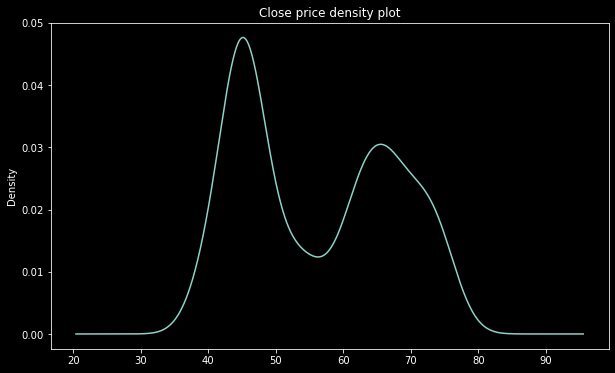

In [10]:
mfn.weekly_plot(weekly, closing=True, kde=True)

#Visualize the stationarity using rolling stats and check ADF test values

In [11]:
mfn.test_stationarity(weekly[0]['close'])

Results of dickey fuller test
Test Statistics                 -0.270710
p-value                          0.929551
No. of lags used                 7.000000
Number of observations used    919.000000
critical value (1%)             -3.437486
critical value (5%)             -2.864690
critical value (10%)            -2.568447
dtype: float64


#Decompose time series to visualize Trends, Seasonalities and Residuals

<Figure size 720x432 with 0 Axes>

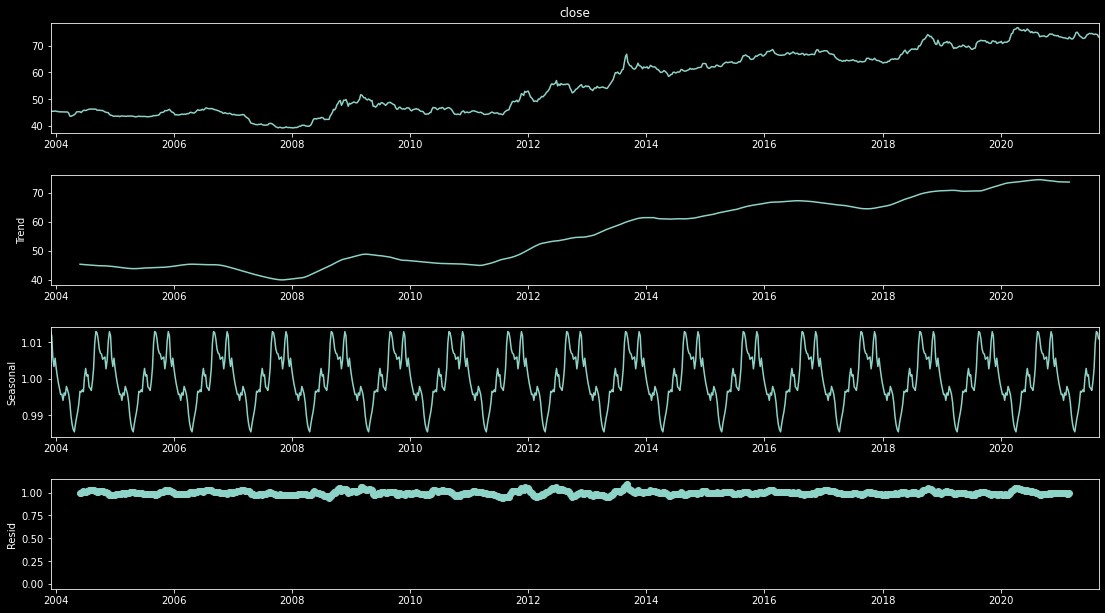

In [12]:
mfn.seasonal_decomp(weekly[0]['close'])

#use log to stabilize the time series and make it stationary

In [13]:
df_log = mfn.conv_to_statn(weekly[0]['close'])

In [14]:
train, test = mfn.train_test_split(df_log)

Auto Arima Model

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-5565.206, Time=0.35 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-5624.496, Time=0.54 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-5619.100, Time=1.85 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-5563.677, Time=0.38 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-5622.913, Time=0.76 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-5622.960, Time=0.62 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-5620.528, Time=1.16 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-5624.453, Time=0.46 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 6.157 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  831
Model:               SARIMAX(1, 1, 0)   Log Likelihood                2815.248
Date:                Sat, 18 Feb 2023   AIC                          -5624.496
Time:                       

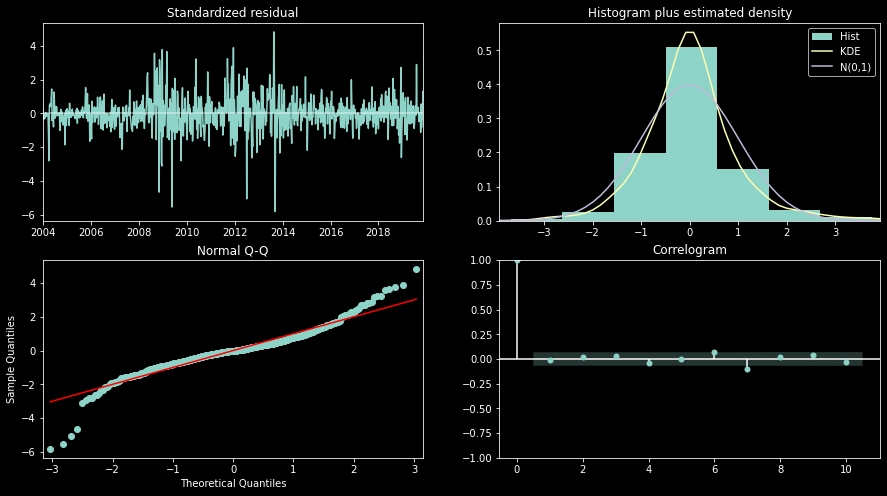

In [15]:
mfn.aut_arima(train)

In [16]:
mfn.arima(train, test, True)

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                  831
Model:                 ARIMA(1, 1, 0)   Log Likelihood                2814.226
Date:                Sat, 18 Feb 2023   AIC                          -5624.453
Time:                        10:37:58   BIC                          -5615.010
Sample:                    12-21-2003   HQIC                         -5620.831
                         - 11-17-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2700      0.022     12.146      0.000       0.226       0.314
sigma2      6.644e-05   1.75e-06     37.903      0.000     6.3e-05    6.99e-05
Ljung-Box (L1) (Q):                   0.07   Jarque-

MSE: 0.0011339080488869154
MAE: 0.029262777070431054
RMSE: 0.033673551177250606
MAPE: 0.0067861488558217395


#Train and test FB prophet and compare the two models to see which performs better

In [17]:
mfn.prophet_model(train, test, True)

10:38:01 - cmdstanpy - INFO - Chain [1] start processing
10:38:02 - cmdstanpy - INFO - Chain [1] done processing


MSE: 0.0009422223295071617
MAE: 0.019481331837450377
RMSE: 0.03069564023615018
MAPE: 0.0045100611420522295


### Summary

#Results

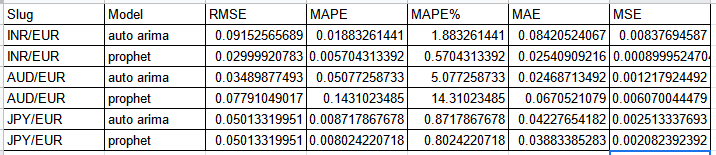